# Deep Learning for Computer Vision

---

**Goethe University Frankfurt am Main**

Winter Semester 2022/23

<br>

## *Assignment 1 (Histogram)*

---

**Points:** 10<br>
**Due:** 2.11.2022, 10 am<br>
**Contact:** Matthias Fulde ([fulde@cs.uni-frankfurt.de](mailto:fulde@cs.uni-frankfurt.de))<br>

---

**Your Name:** Bastian Rothenburger

<br>

<br>

## Table of Contents

---

- [1 Histogram Equalization](#1-Histogram-Equalization-(10-Points))
  - [1.1 Derivation](#1.1-Derivation-(5-Points))
  - [1.2 Implementation](#1.2-Implementation-(5-Points))


<br>

## Setup

---

In this notebook we use the libraries **Matplotlib**, **NumPy** and **OpenCV**. We recommend to use at least the 3.x versions of OpenCV. You can check your version with the statements below.

In [1]:
import numpy as np
import cv2 as cv

# Check installed OpenCV version.
cv.__version__

'4.6.0'

We want Matplotlib figures to appear within the notebook rather than inside a separate window, which is default in some environments, therefore we make use of the `%matplotlib` magic function to set the Matplotlib backend to inline.

In [2]:
import matplotlib.pyplot as plt

# Set default color map and interpolation method for images.
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

%matplotlib inline

We import some utility functions to show images and to plot histograms. See `utils.py` for documentation.

In [3]:
from utils import display, show_plot, show_histogram

<br>

### Exercises

---

### 1 Histogram Equalization (10 Points)

---

In the lecture, *image histograms* have been introduced as a tool to visualize the intensity distribution of an image, allowing both for the analysis and manipulation of digital images. In particular, it has been shown how the **Histogram Equalization** algorithm can be used to increase the global contrast of an image by mapping intensities to a more uniform distribution.

<br>

![histograms](images/histograms.png)

<br>

The above figure provides examples for histograms of dark and light, as well as low and high contrast images. ([Gonzalez and Woods](#ref-1))

The horizontal axis of the histograms represents the intensity levels, ranging from dark to light. The vertical axis represents the number of pixels in the grayscale image with a particular intensity level. Given this ordering, it's not surprising that for the dark and light images, the distribution is concentrated on the left and right hand side of the range, respectively. However, it's an important observation, that low contrast of an image corresponds to a narrow distribution, while in a high contrast image, the distribution is almost uniform.

This gives a visual justification of why the histogram equalization algorithm is working.

<br>

### 1.1 Derivation (5 Points)

---

In this exercise we want to build some intuition for the mathematical foundation of the histogram equalization algorithm.

For this purpose we consider the intensities of the pixels in the image before and after equalization no longer as discrete values, but as continuous random variables $X$ and $Y$, defined over the range $[0, L-1]$ with $L \in \mathbb{N}$ and $L > 1$.

We define $Y$ as the result of a transformation $T$, which we assume to be differentiable and invertible, and that is given by

$$
    Y = T(X) = (L-1) \int_0^X f_X(t) \,\text{d}t
$$

where $f_X$ is the probability density function of $X$.

Show that if the random variable $Y$ is defined this way, it is uniformly distributed over the range $[0, L-1]$, which means the probability density function of $Y$ is given by

$$
    f_Y(y) = \frac{1}{L-1}\,.
$$

##### Proof

*Write your proof here.*
Basic relationship known from statistics if $Y=T(X)$ we known that:
$$
f_{Y}(y) = f_{X}(x)*\Bigl|\frac{dX}{dY}\Bigr|
$$   

Because we know the definiton of $Y$ we can compute the derivative and invert it:

$$
\Bigl|\frac{dX}{dY}\Bigr|=\Bigl|\frac{dY}{dX}\Bigr|^{-1}=\Bigl|\frac{d}{dX}\Bigr[(L-1) \int_0^X f_X(t) \,\text{d}t\Bigr]\Bigl|^{-1}=\Bigl|(L-1)\cdot f_{X}(x)\Bigl|^{-1} \\ 
\Bigl|\frac{dX}{dY}\Bigr|=\Bigl|\frac{1}{(L-1)\cdot f_{X}(x)}\Bigr|
$$

we now plug this into the first equation and get what was supposed to be showed:
$$
f_{Y}(y) = f_{X}(x)\cdot\Bigl|\frac{1}{(L-1)\cdot f_{X}(x)}\Bigr|= \frac{1}{L-1}
$$  
<div style="text-align:right">$\square$</div>

<br>

### 1.2 Implementation (5 Points)

---

We have seen in the previous exercise that in the continuous case, using the cumulative distribution function of the input intensities for the transformation will produce a uniform distribution of the output intensities. However, in practice we have to deal with discrete values, which means we can only approximate a uniform distribution.

Moreover, we want the resulting intensities to be spread across the whole range $[0, L-1]$, with $L$ being the number of intensity levels. There are different ways to achieve this goal, producing similar results. Using the algorithm introduced in the lecture, we apply min-max scaling to the unnormalized cumulative histogram of the input image, multiply with $(L-1)$, and floor the result.

So, the formula we want to use is

$$
    T(x) = \left\lfloor (L-1) \frac{h_x - h_\text{min}}{h_\text{max} - h_\text{min}} \right\rfloor,
$$

<br>

where $h_x$ is the value for intensity $x$ in the unnormalized cumulative histogram $h$. The variable $h_\text{min}$ denotes the minimum non-zero value in $h$ and $h_\text{max}$ is the total number of pixels in the image.

<br>

#### 1.2.1 Task

Complete the definition of the `cumHist` and `equalizeHist` functions below.

Both functions should take a grayscale image as input. The `cumHist` function computes the cumulative histogram of the input image, *optionally* normalized by dividing each value by the number of pixels in the input image. The `equalizeHist` function applies histogram equalization to the input image in order to enhance its contrast, implementing the transformation defined above.

The input type should be `uint8` for both functions. For the `equalizeHist` function, this should also be the output type.

Use only vectorized NumPy operations to implement the algorithms.

<br>

#### 1.2.2 Solution

Fill your code in the cells below.

In [36]:
def cumHist(image, norm=False):
    """
    Compute the cumulative histogram of the grayscale input image.

    Parameters:
        - image: Grayscale input image.
        - norm: Normalize the cumulative histogram.

    Returns:
        - out: Cumulative histogram.

    """
    ############################################################
    #                    START OF YOUR CODE                    #
    ############################################################
    #flat image
    flat=image.flatten()
    #create histogramm with at least 256 bins because pixel values range from 0 to 255
    histogram = np.bincount(np.int64(flat), minlength=256)
    #compute cumulative histogram
    out = np.cumsum(histogram)

    if norm==True:
        #normalize by dividing through the number of pixel values
        out = out/(len(flat))

    ############################################################
    #                     END OF YOUR CODE                     #
    ############################################################
    return out

In [50]:
def equalizeHist(image):
    """
    Apply histogram equalization to a grayscale input image.

    Parameters:
        - image: Grayscale input image.

    Returns:
        - out: Equalized image.

    """
    ############################################################
    #                    START OF YOUR CODE                    #
    ############################################################
    #make use of the function defined before
    probdense = cumHist(image, norm=True)
    #apply equalization to every pixel
    out = np.floor(255 * probdense[image])
    
    ############################################################
    #                     END OF YOUR CODE                     #
    ############################################################
    return out

<br>

#### 1.2.3 Result

Let's test the function with a low contrast radio image showing lung metastases. If you implemented the algorithms correctly, the cumulative histogram of the equalized image should be close to linear.

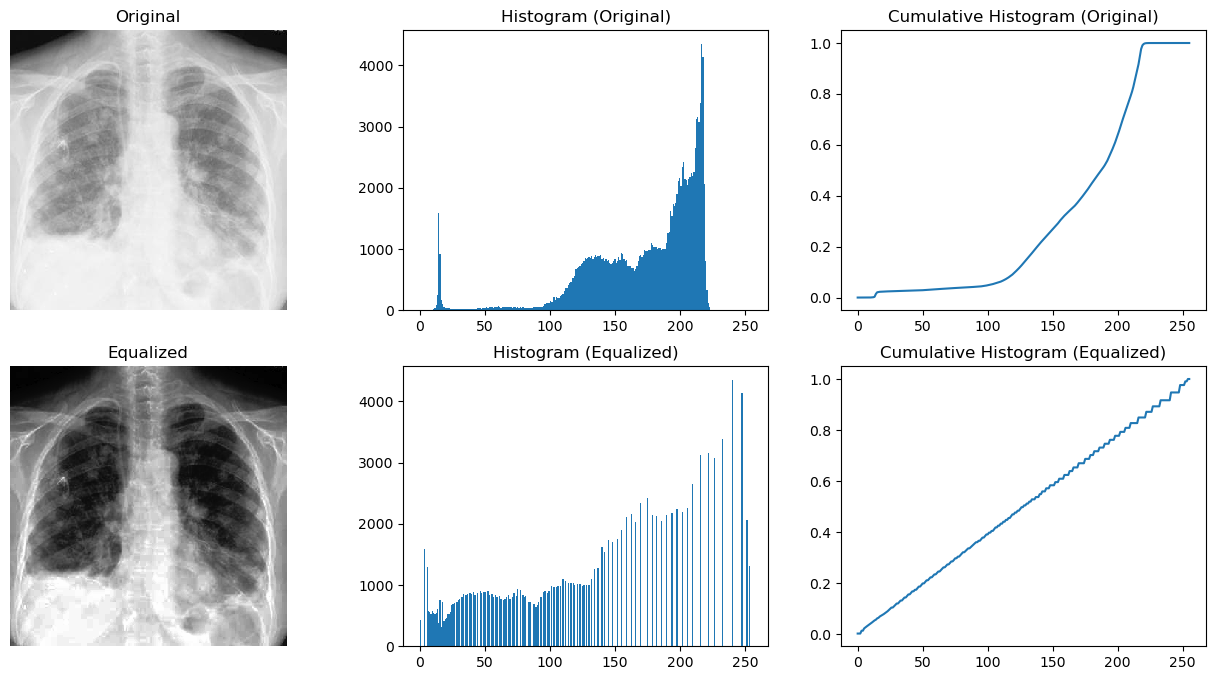

In [51]:
# Load grayscale image.
img = cv.imread('lung.jpg', cv.IMREAD_GRAYSCALE)

# Apply histogram equalization to the image.
res = equalizeHist(img)

# Calculate normalized cumulative histograms.
img_h, res_h = [cumHist(x, norm=True) for x in [img, res]]

# Show images and histograms.
display((16, 8), [
    (img,   'Original',  231),
    (res,   'Equalized', 234),
    (img,   'Histogram (Original)',  232, True, show_histogram),
    (res,   'Histogram (Equalized)', 235, True, show_histogram),
    (img_h, 'Cumulative Histogram (Original)',  233, True, show_plot),
    (res_h, 'Cumulative Histogram (Equalized)', 236, True, show_plot)
])

<br>

### References

1. <span id="ref-1">Rafael C. Gonzalez and Richard E. Woods, "Digital image processing", 4th Edition, 2018.</span>

<br>